# Aprendizagem não supervisionada

Parcialmente adaptado de Dr. Leandro Andrade, Luke ZettleMoyer, Vibhav Gogate, Carlos Guindin, Andrew Moore, Dan Klein

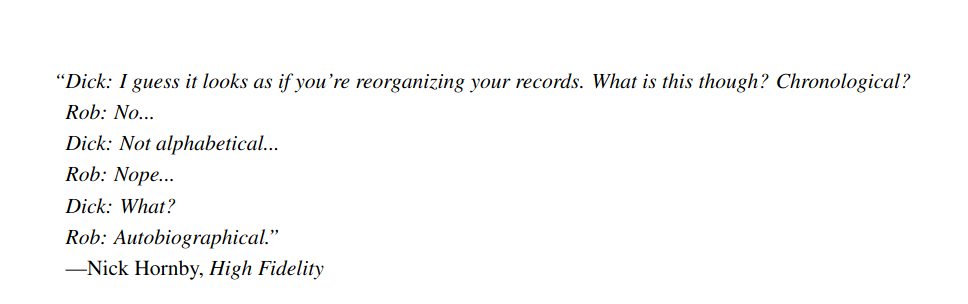

# 1. Visão geral

- Aprender padrões baseado em dados de entrada quando **não são fornecidos valores de saída**
- São úteis quando a informação sobre a classificação ou dados de entrada é escassa ou inexistente
- As saídas são labels ou classes não rotuladas!


Ex. classe 0, 1 ou 2

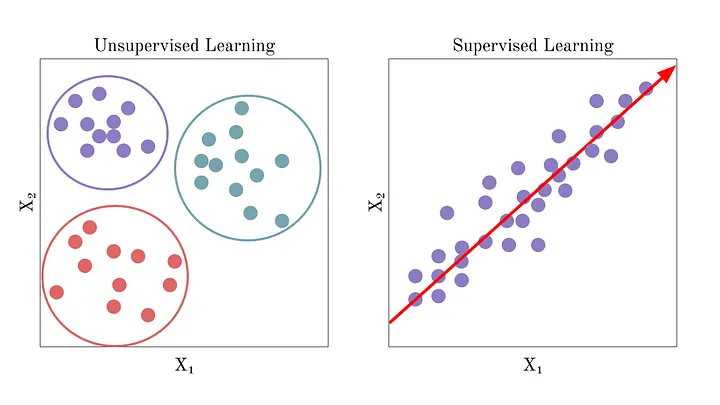

# Qual o significada das saídas?

## Depende!

- O significa deve ser determinado pelo especialista humano ou um agente inteligente.

- Pode inclusive ser algo indireto (performance) de um outro método


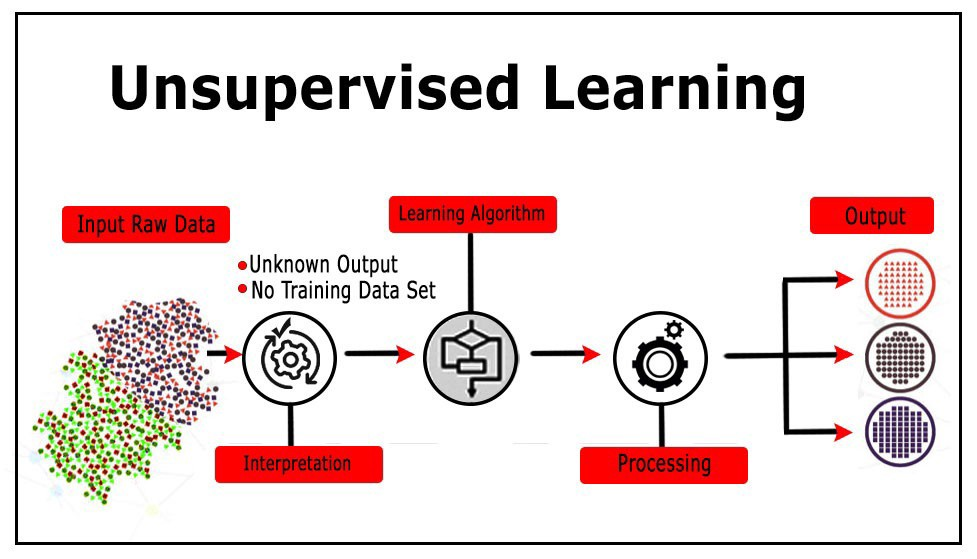

# 2. **Aplicações comuns**

## 2.1 Agrupamento (ou clustering)

Descobrir grupos, padrões ou classes inerentes em um conjunto de dados

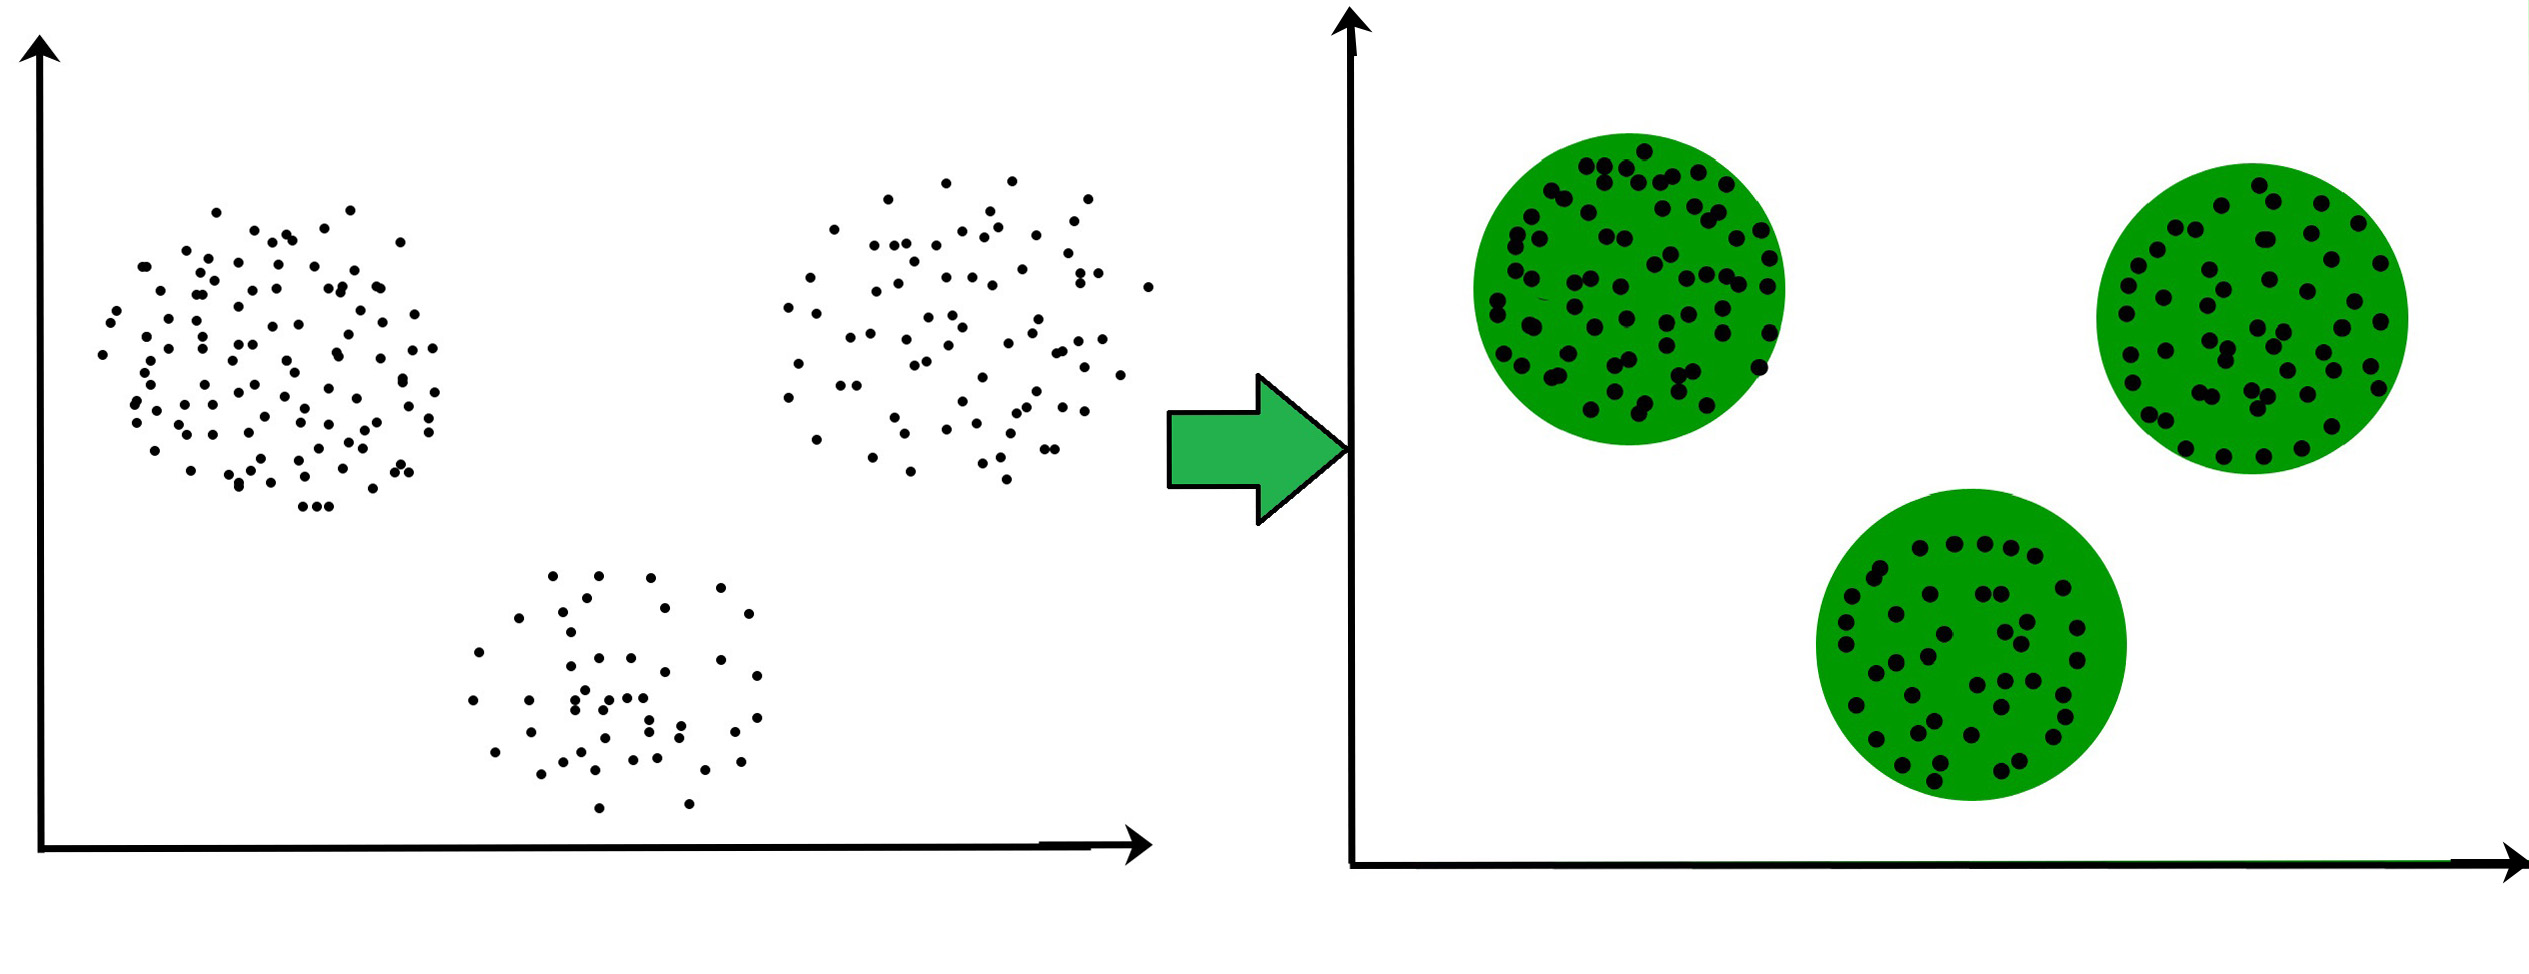

## 2.2 Associação

Permite descrever grandes porções de dados através da inferência de regras


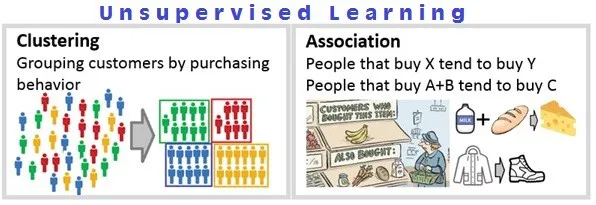

## 2.3 Redução de dimensionalidade

Se deseja reduzir a quantidade de dimensões presentes nos dados, assumindo que uma grande porção dos dados é redundante, e que é possível representar todo ou boa parte dos dados com somente uma fração deles.
- Visualização de dados
- Transfer Learning
- Diminuir impacto da maldição da dimensionalidade

ATENÇÃO: Existem métodos de redução de dimensionalidade que seguem estratégias bem diferentes
- Redução de dimensionalidade baseado em remoção de features

Columns: iris_df.columns=Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


<Axes: xlabel='PC1', ylabel='PC2'>

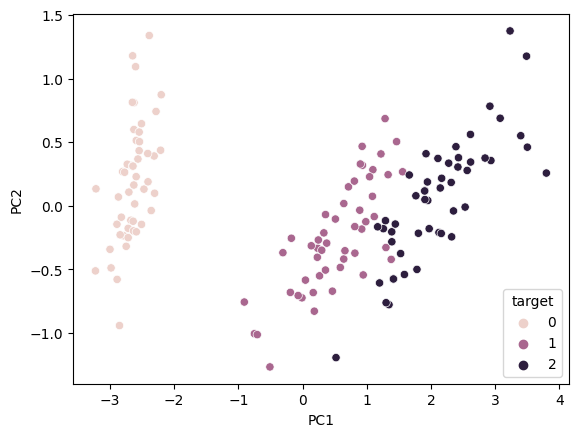

In [ ]:
# Exemplo com Principal Component Analysis (PCA)
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(f"Columns: {iris_df.columns=}")

# Apenas defina o número de componentes quando utilizar PCA para visualização
pca = PCA(n_components=2)
# pca = PCA(n_components = 0.95) # Quanto de variância você gostaria de explicar
iris_pca = pca.fit_transform(iris_df)

# create a new dataframe with the PCA results
iris_pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])

# add the target variable to the dataframe
iris_pca_df['target'] = iris.target

# plot the results
import seaborn as sns
sns.scatterplot(x='PC1', y='PC2', hue='target', data=iris_pca_df)


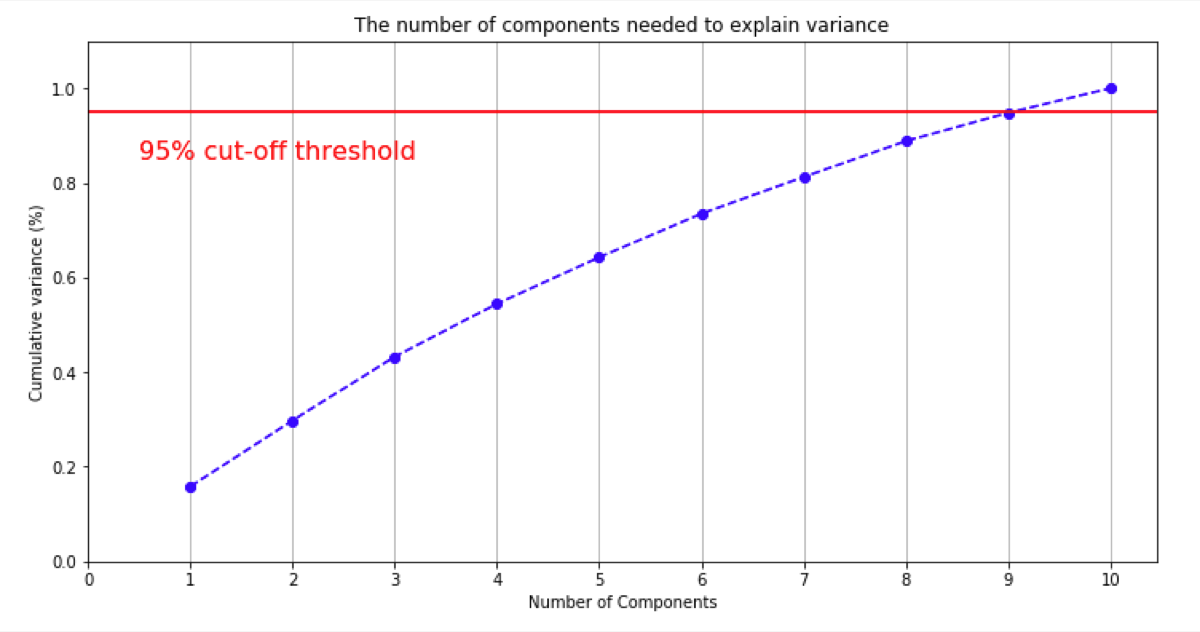

# 3. **Agrupamento**

Uma técnica de aprendizado de máquina não supervisionado que envolve a divisão de um conjunto de dados em grupos ou clusters, com base em alguma medida de similaridade ou dissimilaridade entre os dados. O objetivo é encontrar grupos que contenham dados semelhantes e que sejam diferentes dos outros grupos.

Uma maneira comum de caracterizar similaridade seria:

## - distância euclidieana (quadrada):

# $\mathrm{dist}(\vec{x}, \vec{y}) = ||\vec{x} - \vec{y}||^{2}_{2}$

## - Distância de Manhattan

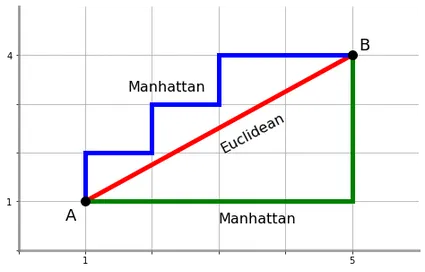


## - Distância de Chebyshev

A distância de Chebyshev é a maior diferença absoluta entre as coordenadas dos pontos em cada dimensão

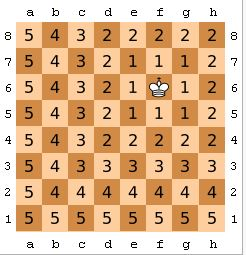

# Algoritmos de agrupamento


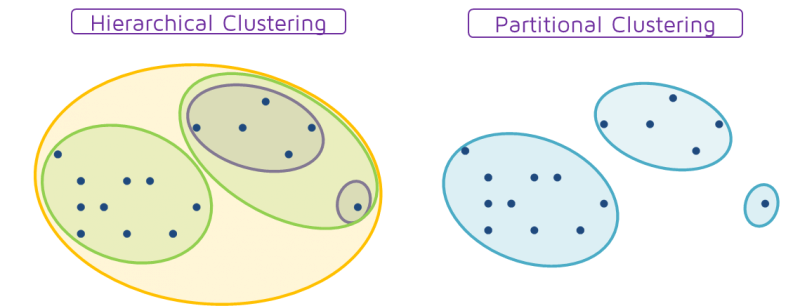



# Aprendizado não supervisionado: K-means

Antes de ter uma aula completa com os tipos de algoritmos e suas principais propriedades. Vamos examinar um exemplo real com um exemplo de algoritmo **particional** chamado K-Means

Embaixo um descrição passo-a-passo do algoritmo



- Inicialize o número de clusters K e selecione K pontos aleatórios do conjunto de dados para serem os centroides iniciais.

- Atribua cada ponto do conjunto de dados ao cluster cujo centróide está mais próximo.

- Recalcule os centroides de cada cluster como a média dos pontos que pertencem a esse cluster.

- Repita os passos 2 e 3 até que a atribuição de clusters não mude ou um critério de parada seja atingido (por exemplo, um número máximo de iterações).

- O algoritmo converge quando os centróides não mudam entre duas iterações consecutivas.

- O resultado final é uma divisão do conjunto de dados em K clusters, onde cada cluster é representado por seu centróide.

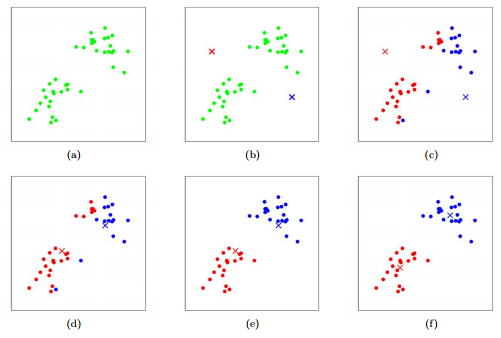

igura 1: Algoritmo K-means. Os exemplos de treinamento são mostrados como pontos, e os centróides dos clusters são mostrados como cruzes. (a) Conjunto de dados original. (b) Centróides de cluster iniciais aleatórios. (c-f) Ilustração da execução de duas iterações do K-means. Em cada iteração, atribuímos cada exemplo de treinamento ao centróide de cluster mais próximo (mostrado "pintando" os exemplos de treinamento com a mesma cor do centróide de cluster ao qual está atribuído); em seguida, movemos cada centróide de cluster para a média dos pontos atribuídos a ele.

# Exemplo de utilização


Imagine que observamos diversas amostras de flores com características similares. Entretanto percebemos que existem três variações possíveis mas uma maneira clara e objetiva de diferencia-las não fica evidente.

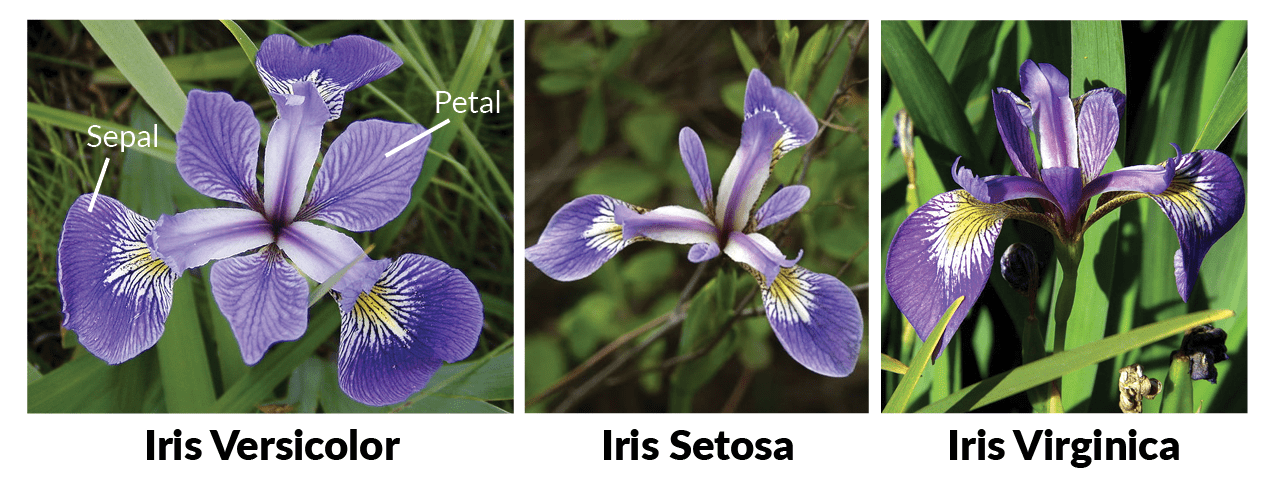

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Create a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable as a new column
df['target'] = iris.target
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


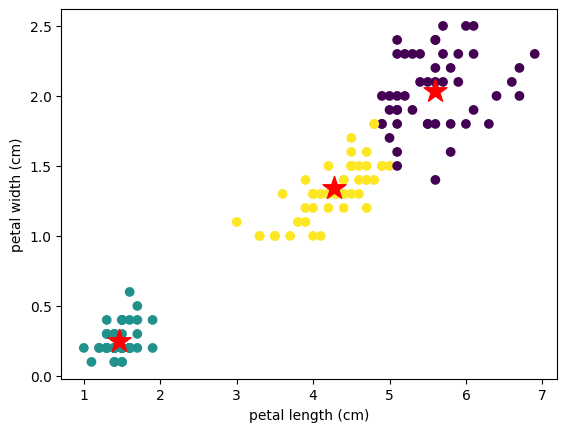

In [ ]:
from sklearn.cluster import KMeans
columns = ['petal length (cm)', 'petal width (cm)']
X = df[columns]  # Select only petal length and width

# Use K-means clustering to group the samples into 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Print the predicted cluster assignments for the first 100 samples
print(kmeans.predict(X[:100]))

# Plot the clusters and centroids
import matplotlib.pyplot as plt

plt.scatter(X[columns[0]], X[columns[1]], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

# E se utilizarmos o sepal length and width?

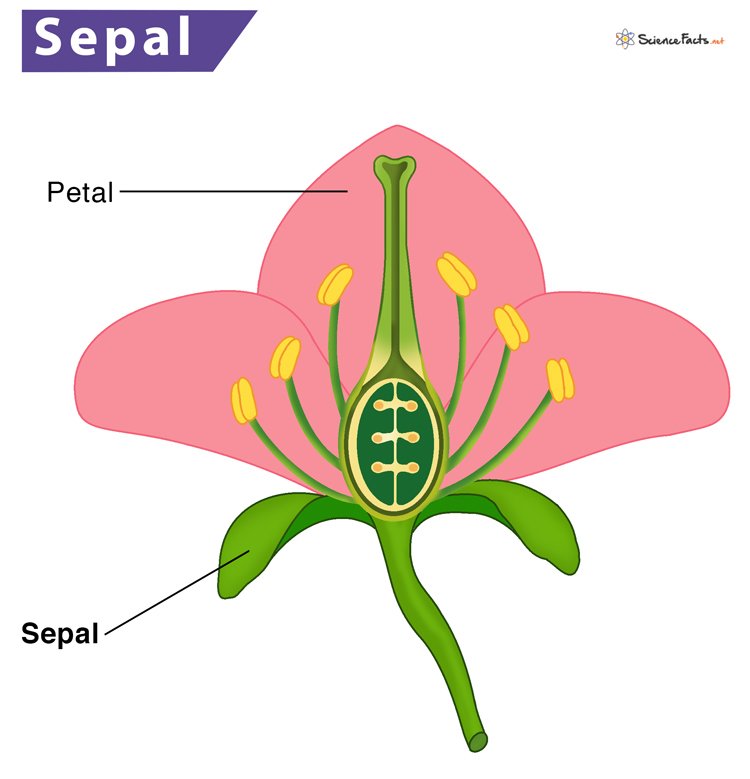

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2]


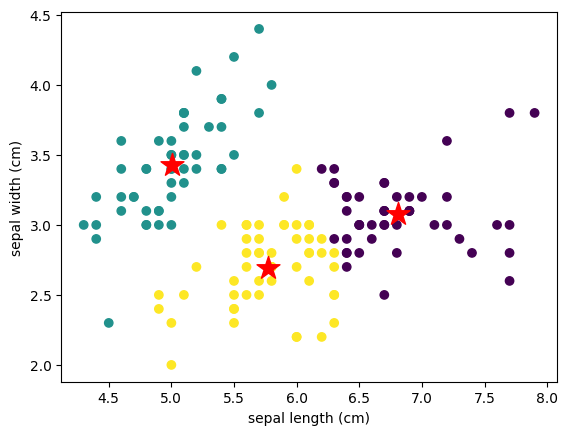

In [ ]:
columns = ['sepal length (cm)', 'sepal width (cm)']
X = df[columns]  # Select only petal length and width

# Use K-means clustering to group the samples into 3 clusters
# n_init -> Número de vezes que o algoritmo é executado com diferentes seeds
# n_clusters -> Número de clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Print the predicted cluster assignments for the first 100 samples
print(kmeans.predict(X[:100]))

# Plot the clusters and centroids
import matplotlib.pyplot as plt

plt.scatter(X[columns[0]], X[columns[1]], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

# Elbow Plot

Uma maneira de determinar o número de partições é utilizando um elbow plot


Note que a  inércia representa:

    Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.


Text(0.5, 1.0, 'Elbow curve')

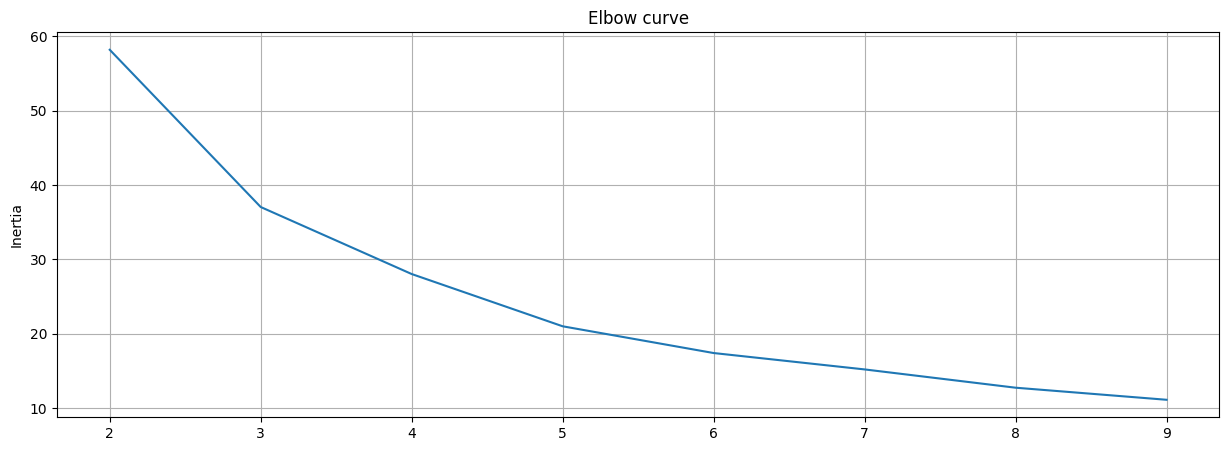

In [ ]:
columns = ['sepal length (cm)', 'sepal width (cm)']
X = df[columns]  # Select only petal length and width
distorsions = []
klimit = 10
for k in range(2, klimit):
    kmeans = KMeans(n_init=10, n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, klimit), distorsions)
plt.ylabel("Inertia")
plt.grid(True)
plt.title('Elbow curve')


# Conclusão

## Vantagens:

- K-means é um algoritmo de clusterização simples e fácil de entender
- É computacionalmente eficiente
- O algoritmo é facilmente escalável para conjuntos de alta dimensionalidade
- A saída do K-means é fácil de interpretar, pois consiste em um conjunto de centróides de cluster que podem ser usados para rotular novos pontos de dados.

## Desvantagens:

- K-means pressupõe que os clusters são esféricos e têm variâncias semelhantes
- O algoritmo é sensível à escolha inicial dos centróides de cluster (não-ótimo)
- O número de clusters K deve ser especificado com antecedência.
- K-means pode ser afetado por outliers ou ruídos nos dados